<a href="https://colab.research.google.com/github/Madmjce/PPE_detection_yolov8/blob/main/yolov8_2805.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sun May 28 03:48:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
import os

drive.mount("/content/gdrive", force_remount=True)
os.chdir('gdrive/MyDrive/')

Mounted at /content/gdrive


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content/gdrive/MyDrive


In [ ]:
#cd /content/gdrive/MyDrive/Yolov8

/content/gdrive/MyDrive/Yolov8


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/78.2 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
#!git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
#!pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
2023-05-28 03:49:34.518493: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 03:49:35.358816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/gdrive/MyDrive/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 59.5ms
Speed: 0.7ms pre-process, 59.5ms inference, 256.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


/content


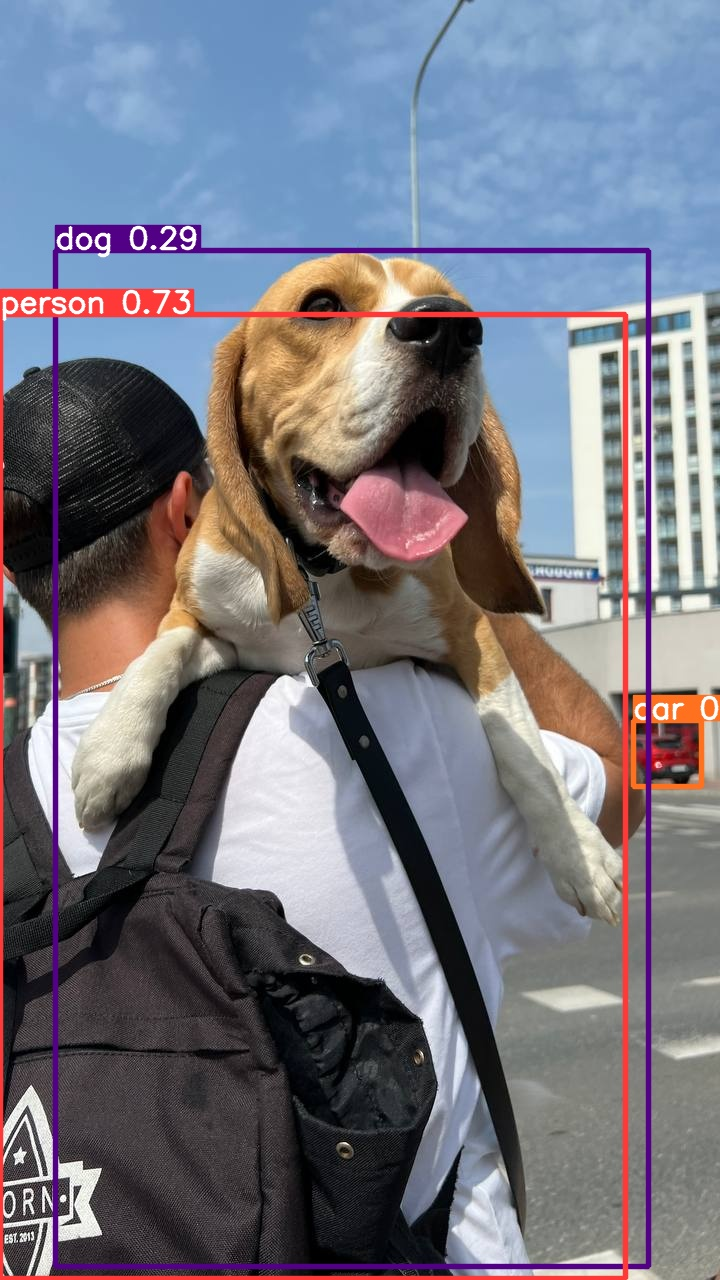

In [7]:
%cd {HOME}
Image(filename='runs/detect/predict2/dog.jpeg', height=600)

In [8]:
model = YOLO(f'{HOME}/yolov8m.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs
Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg


In [9]:
results[0].boxes.xyxy

tensor([[  69.,  250.,  644.,  929.],
        [   0.,  354.,  637., 1275.],
        [ 627.,  734.,  696.,  787.],
        [   0.,  676.,  440., 1280.]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.78887, 0.73023, 0.72939, 0.41130], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([16.,  0.,  2., 24.], device='cuda:0')

In [12]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3EmvWjzBX1XrL8BCG0TD")
project = rf.workspace("danang-university-of-technology-xddua").project("ppe-detect-v3")
dataset = project.version(9).download("yolov8")


mkdir: cannot create directory ‘/content/gdrive/MyDrive/datasets’: File exists
/content/gdrive/MyDrive/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=0dbb4579faa534cc28510f2777433ca7191c5408acf6a9b9b93e6cc85c11d849
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pypa

loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to PPE-detect-v3-9 in yolov8:: 100%|██████████| 3386/3386 [00:19<00:00, 177.30it/s]


In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch=16 epochs=22 imgsz=640 plots=True

/content/gdrive/MyDrive
100% 21.5M/21.5M [00:00<00:00, 183MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/gdrive/MyDrive/datasets/PPE-detect-v3-9/data.yaml, epochs=22, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

In [20]:
!ls {HOME}/runs/detect/train2/

args.yaml					     train_batch1045.jpg
confusion_matrix.png				     train_batch1046.jpg
events.out.tfevents.1685248913.4fb60b26dbdd.14816.0  train_batch1.jpg
F1_curve.png					     train_batch2.jpg
P_curve.png					     val_batch0_labels.jpg
PR_curve.png					     val_batch0_pred.jpg
R_curve.png					     val_batch1_labels.jpg
results.csv					     val_batch1_pred.jpg
results.png					     val_batch2_labels.jpg
train_batch0.jpg				     val_batch2_pred.jpg
train_batch1044.jpg				     weights


/content/gdrive/MyDrive


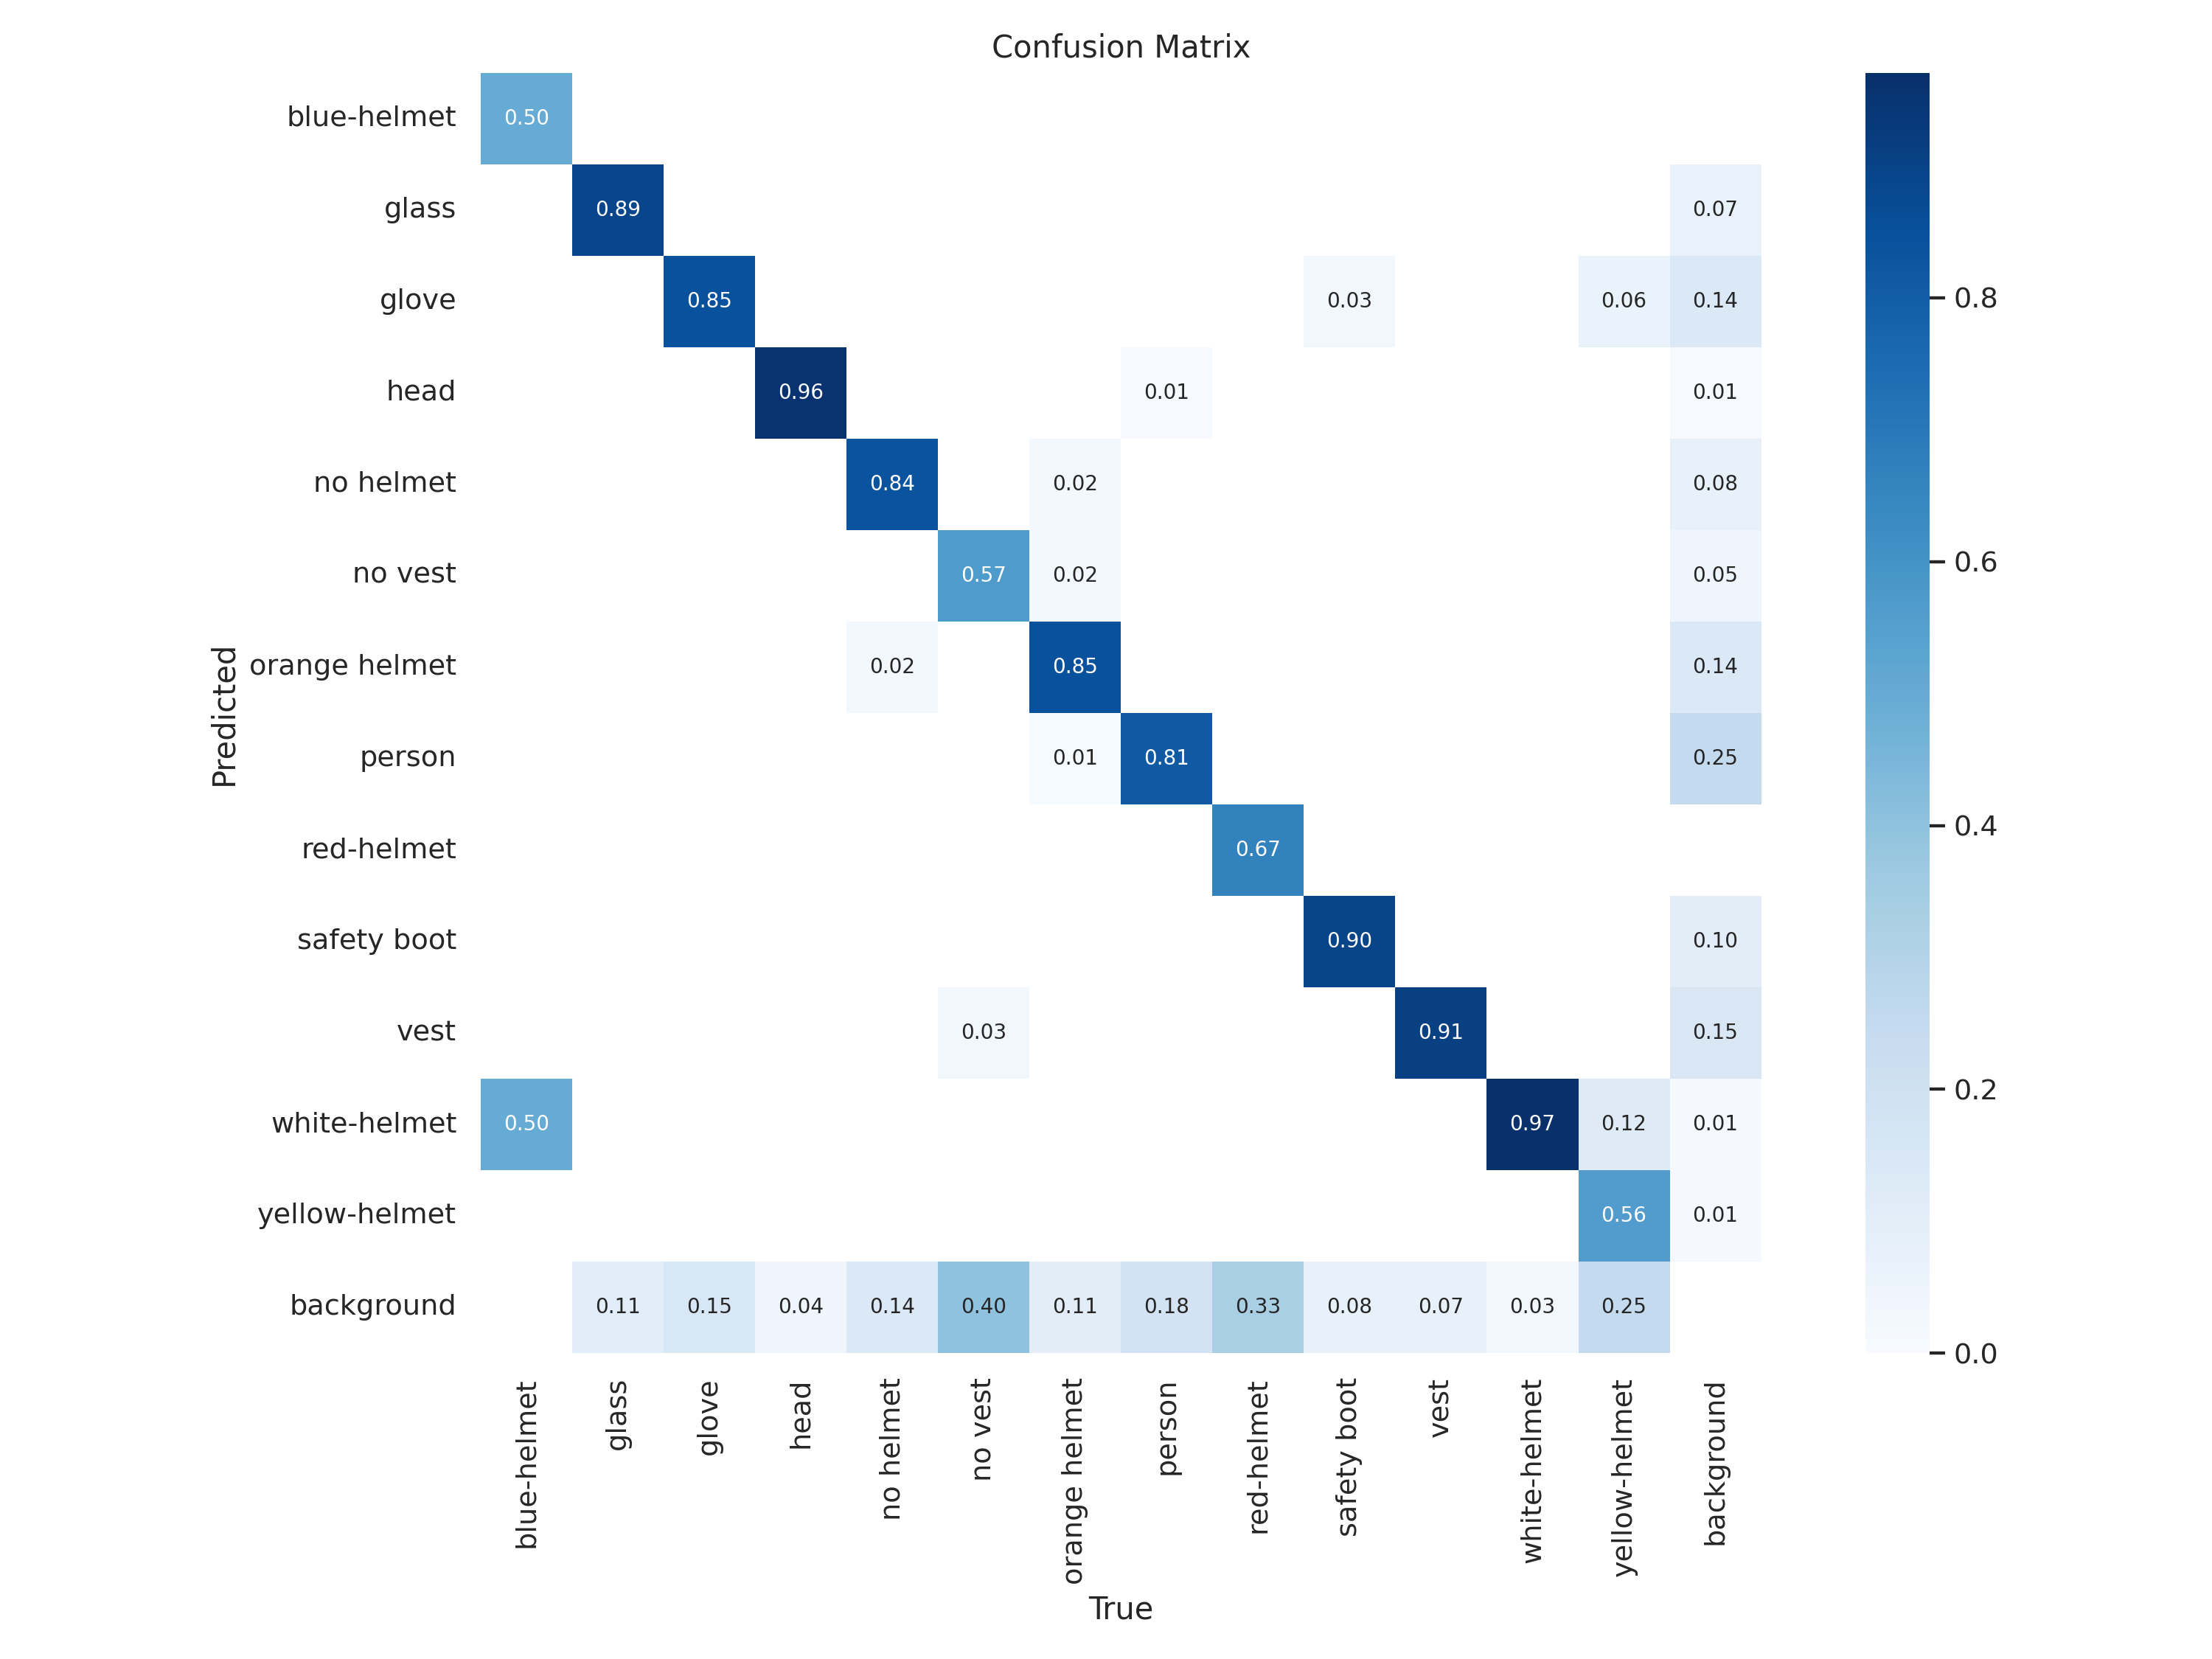

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content/gdrive/MyDrive


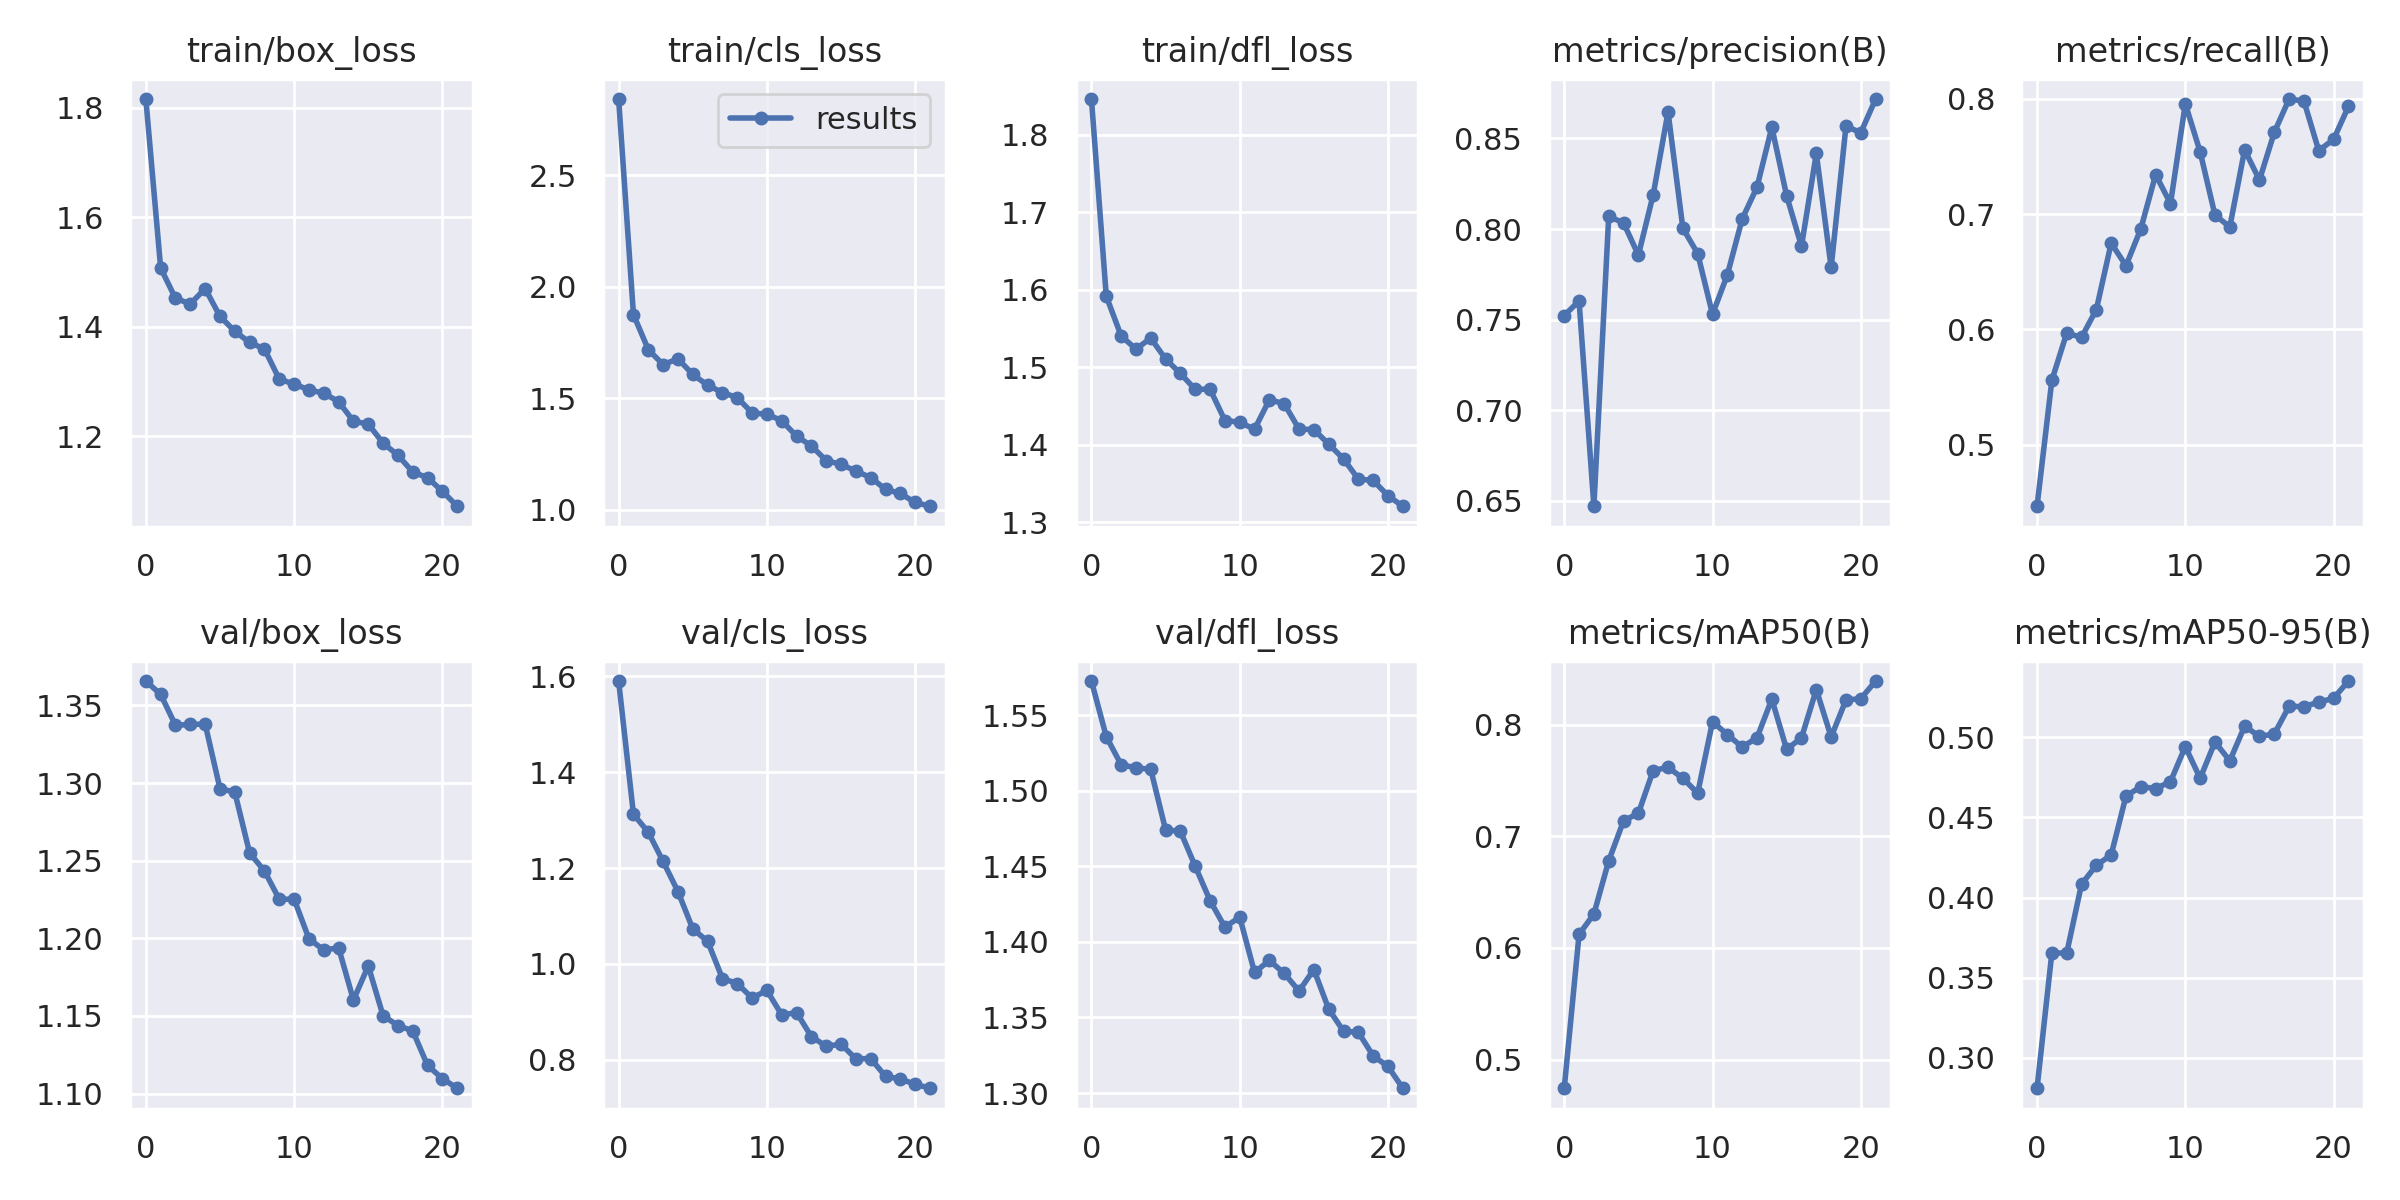

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content/gdrive/MyDrive


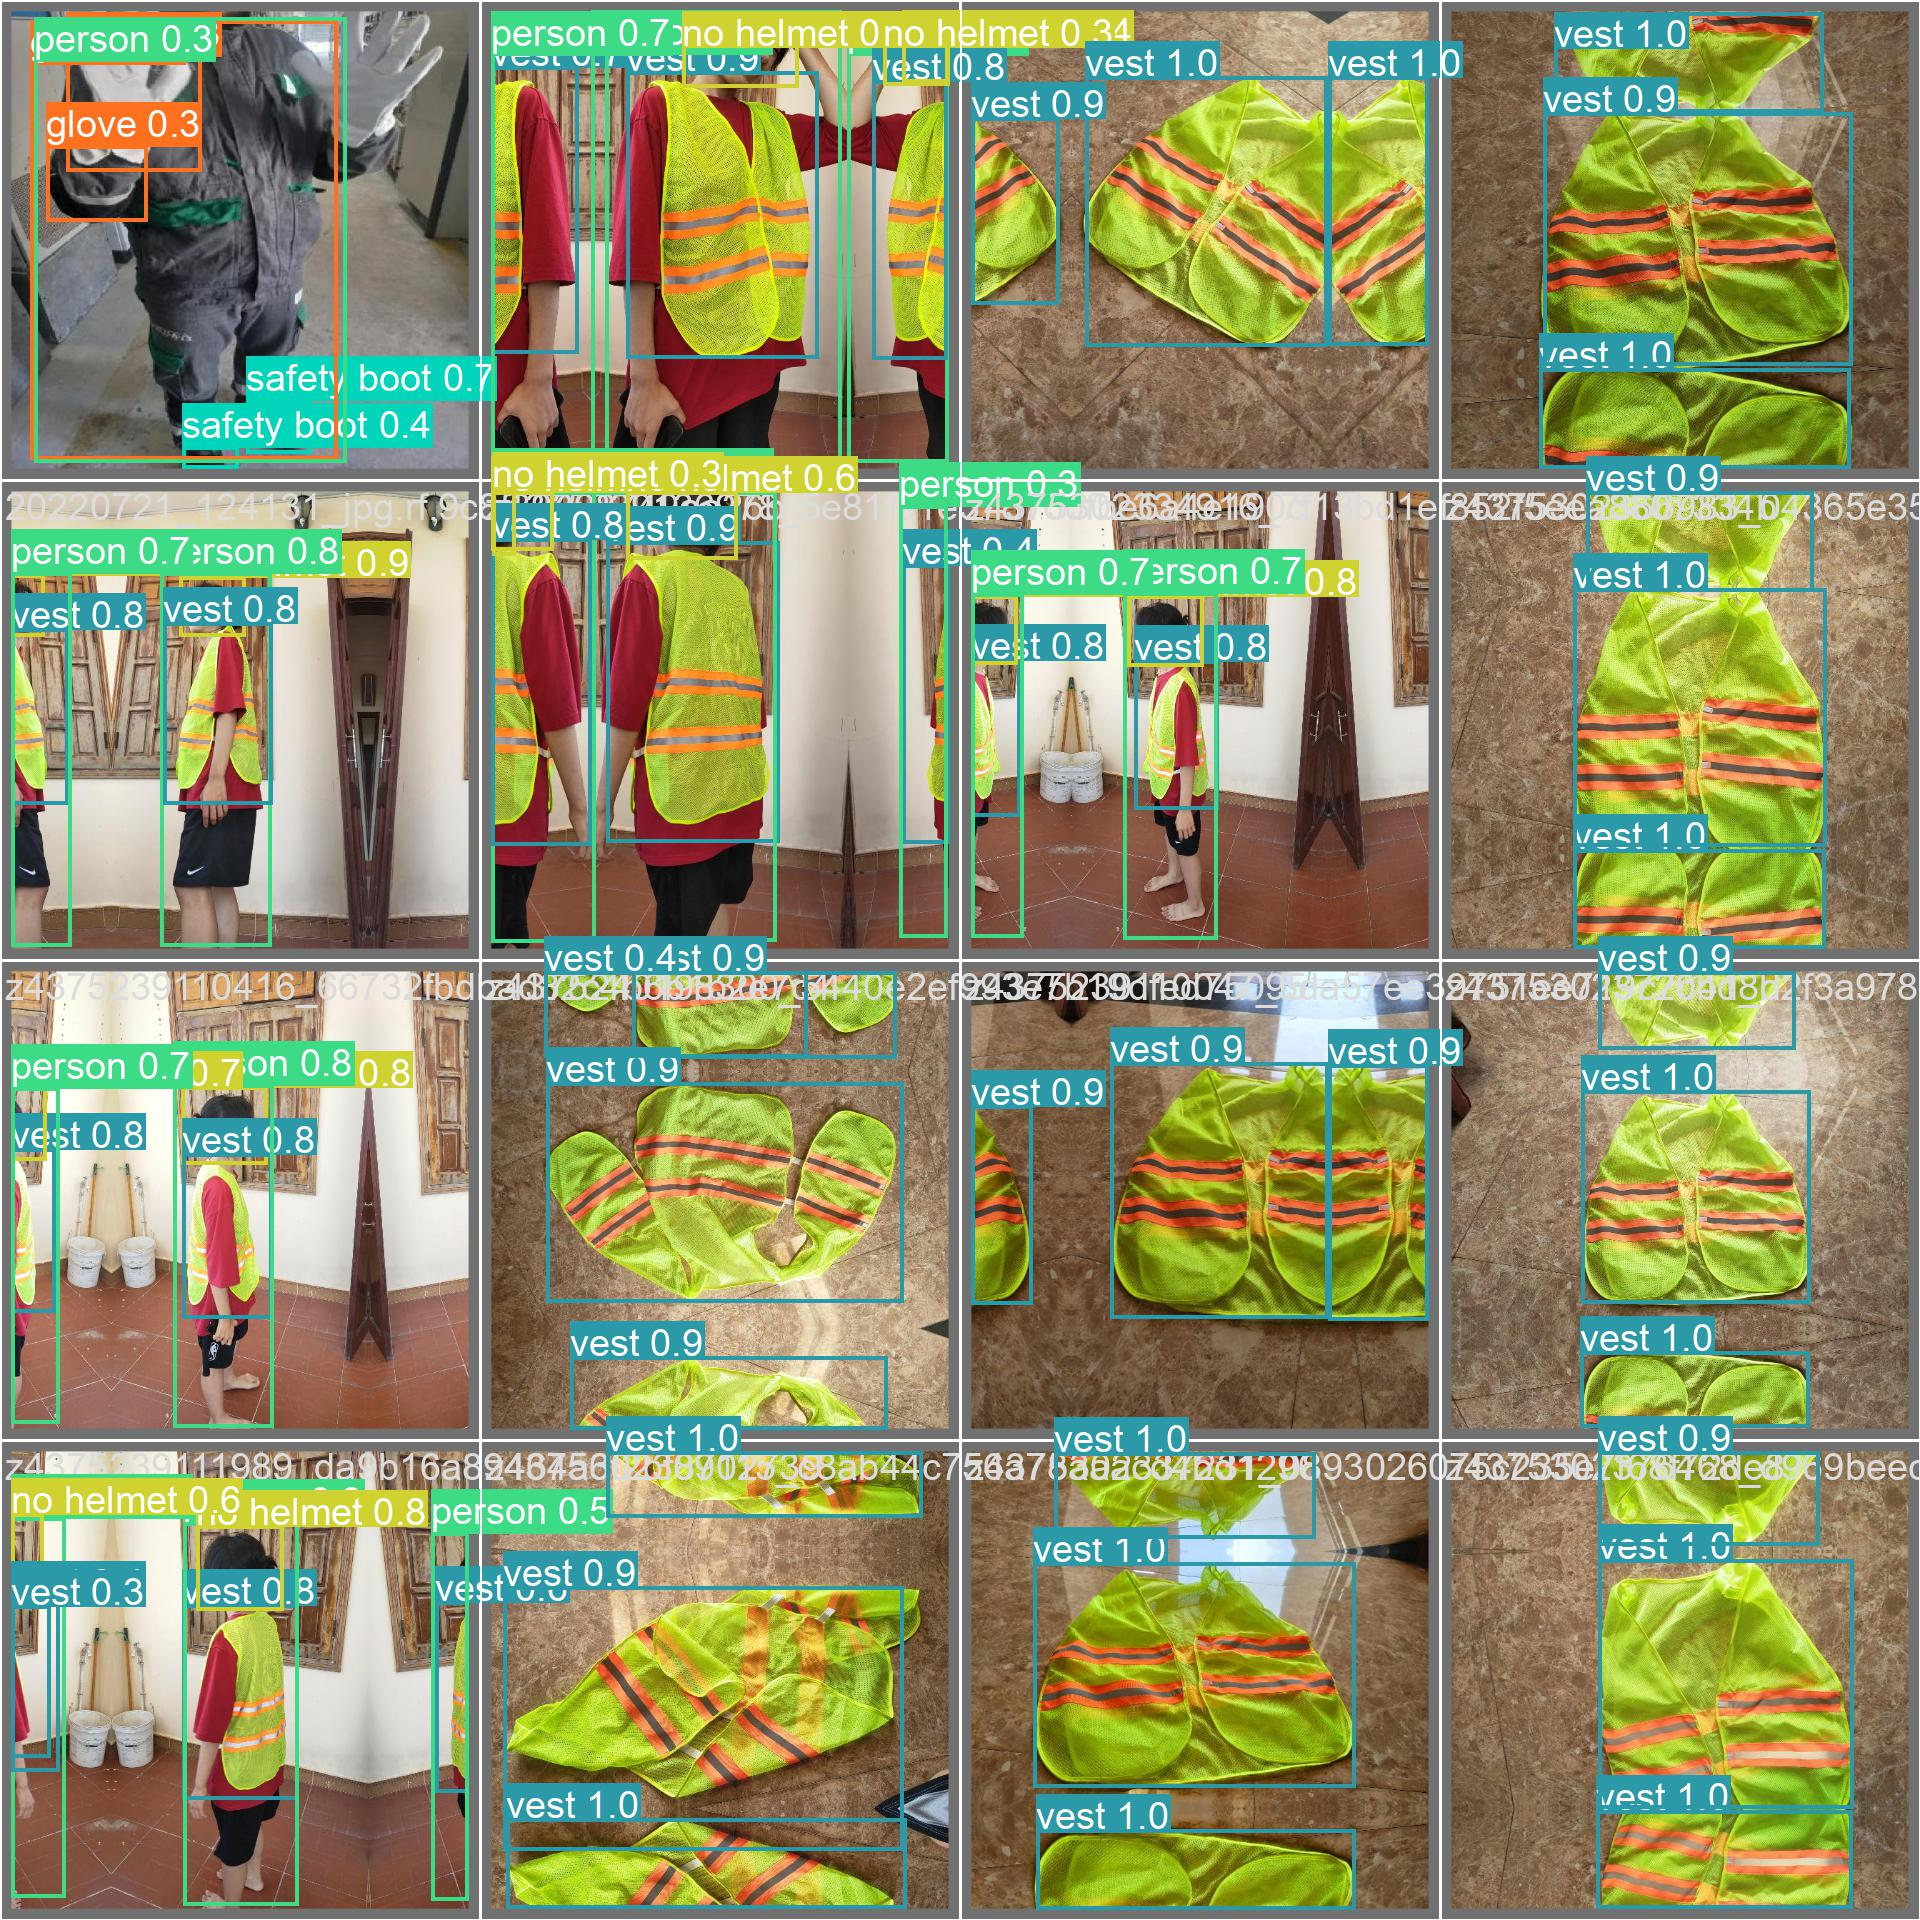

In [23]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content/gdrive/MyDrive
2023-05-28 05:06:36.048493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25847287 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/gdrive/MyDrive/datasets/PPE-detect-v3-9/valid/labels.cache... 178 images, 0 backgrounds, 0 corrupt: 100% 178/178 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 117, len(boxes) = 929. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:14<00:00,  1.25s/it]
                   all        178        929      0.812      0.721      0.774      0.495
           blue-helmet        178          2

In [24]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/gdrive/MyDrive
2023-05-28 05:08:02.456320: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs
image 1/123 /content/gdrive/MyDrive/datasets/PPE-detect-v3-9/test/images/20220621_132920_jpg.rf.5a5bf659d08963a4adcca4bf0aac5ba1.jpg: 640x640 1 person, 2 safety boots, 1 vest, 1 white-helmet, 20.6ms
image 2/123 /content/gdrive/MyDrive/datasets/PPE-detect-v3-9/test/images/20220721_161935_jpg.rf.0545dd51a4423ff7b3e80c9a4052e93d.jpg: 640x640 1 glove, 16.2ms
image 3/123 /content/gdrive/MyDrive/datasets/PPE-detect-v3-9/test/images/IMG-20221020-WA0068_jpg.rf.7e1038b129b47e33d8bc6c5f082e06c5.jpg: 640x640 1 glove, 16.2ms
image 4/123 /content/gdrive/MyDrive/datasets/PPE-detect-v3-9/test/images/IMG-20221020-WA0121_jpg.rf.becdbe4d93b034c813d59ab8b75db748.jpg: 640x640 3 gloves, 16.1ms
im

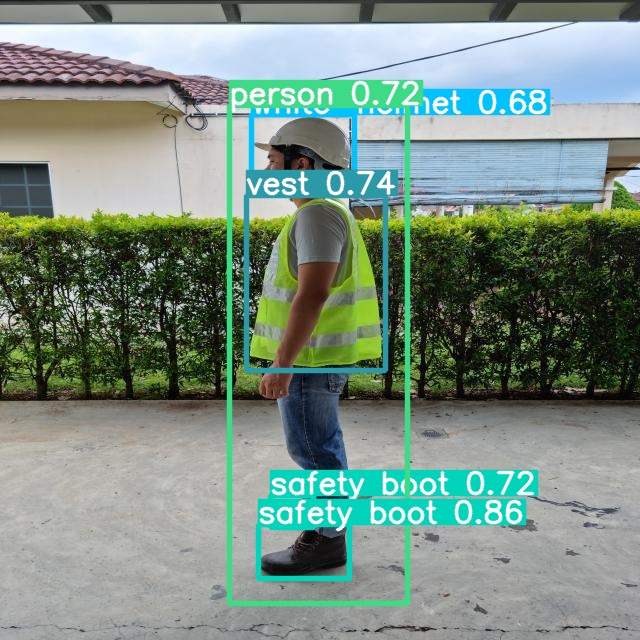

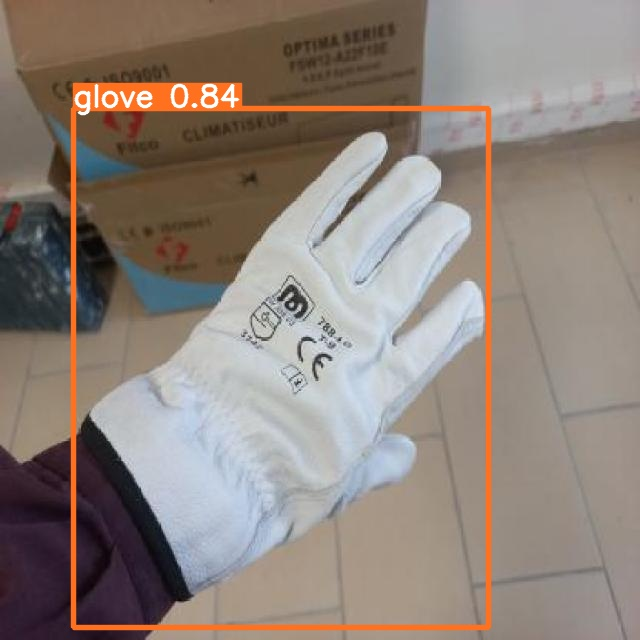

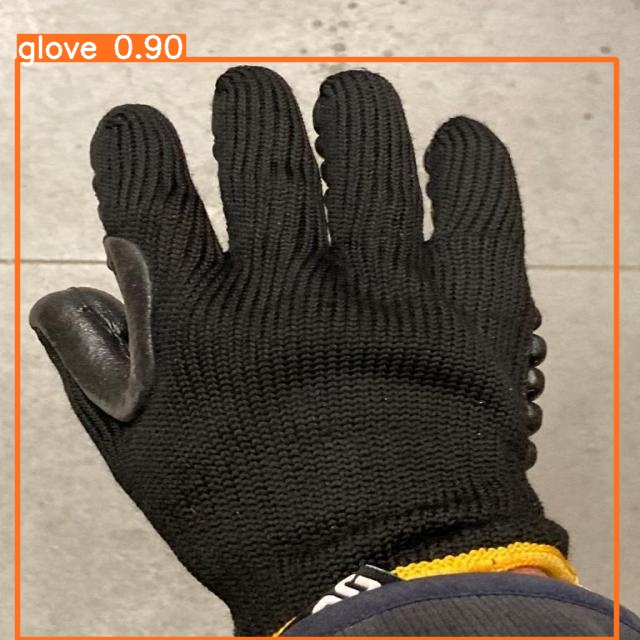

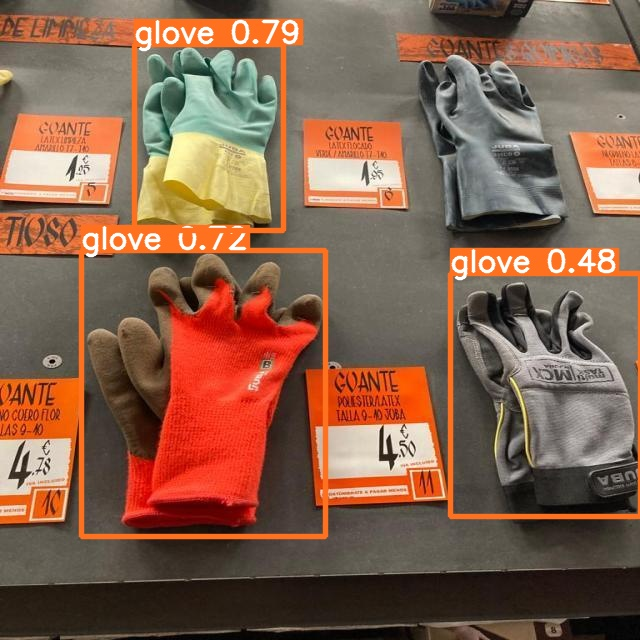

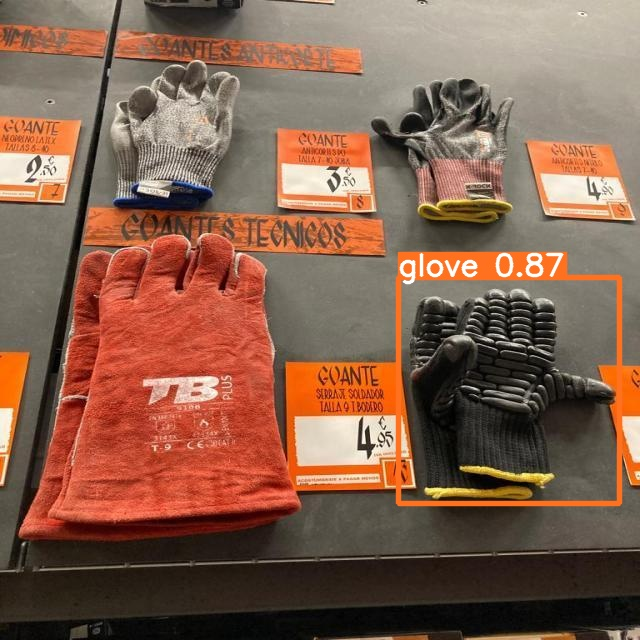

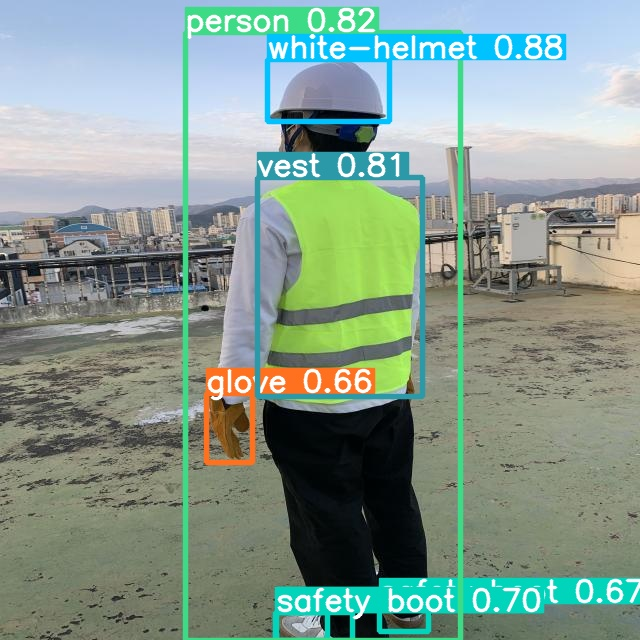

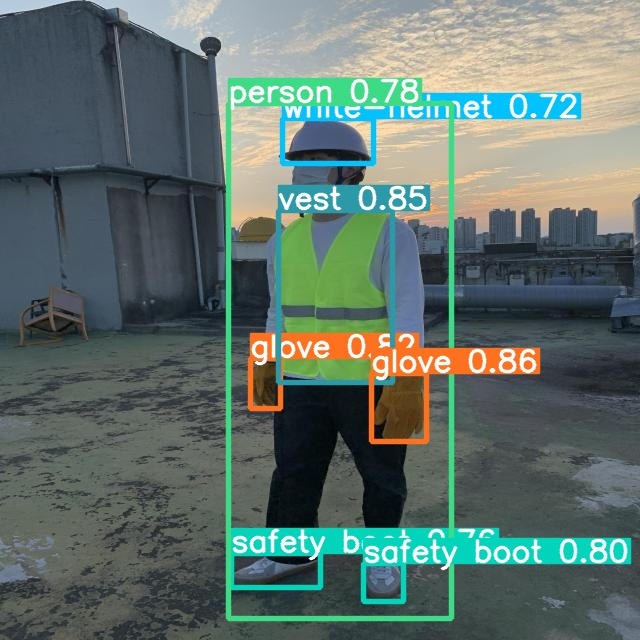

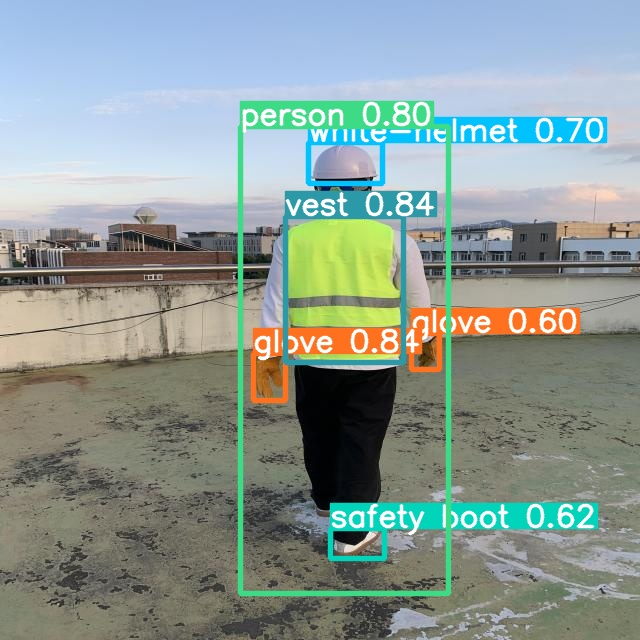

In [27]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:8]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [28]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [29]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on images-56-_jpg.rf.f46224c30c6054f138361e8dbf3fbc05.jpg


HTTPError: ignored